# Classification of Arctic Charr Morphs

## About Project Presenter

- Arif Çakır
- cakirar19@itu.edu.tr
- 090190355

## Data Set Introduction

### Importing Libraries

In [1]:
import time #to measure time taken for execution
start_time = time.time() #start time

import pandas as pd  #for data manipulation
import matplotlib.pyplot as plt #for plotting
from sklearn.model_selection import train_test_split #for splitting data into train and test
import seaborn as sns #for plotting
from sklearn import set_config #to display outputs in a pandas dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF
import numpy as np #for mathematical operations
from sklearn.preprocessing import OneHotEncoder #for one hot encoding
from sklearn.preprocessing import StandardScaler #for scaling
from mlxtend.feature_selection import SequentialFeatureSelector as SFS #for feature selection
from sklearn.linear_model import LogisticRegression #for using in SFS and model
from sklearn.neighbors import KNeighborsClassifier #for model
from sklearn.model_selection import GridSearchCV #for best number of neighbors
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #for model evaluation
from sklearn.svm import SVC #Support Vector Classifier
import session_info #session info

set_config(transform_output="pandas")

### Information About Data Set
In this project, dataset of the paper [A brain and a head for a different habitat: size variation in four morphs of Arctic charr (Salvelinus alpinus (L.)) in a deep oligotrophic lake](https://datadryad.org/stash/dataset/doi:10.5061/dryad.15dv41nvt) is used. The dataset obtained by observations of Arctic charr (or Salvelinus alpinus) in  Lake Tinnsjøen of Norway. Arctic charr is a cold water fish species, and four morphs of it are observed in the dataset. The features contain morphological information about the fish species and the habitat they live in. The dataset is obtained by observation of 72 different fish. Furthermore, column names of the dataset are not descriptive, so they are renamed. Original dataframe is shown below.

In [2]:
df = pd.read_csv('https://datadryad.org/stash/downloads/file_stream/400494')
df.head()

,ID,Morph,Body length (mm),N1,H1(mm ),L1 (mm ),W2(mm ),H 2 (mm ),L2(mm ),W3 (mm ),...,H6 (mm ),L6 (mm ),Eye D1,Eye D2,Genetic trait,Maturation,Age,Sex,Habitat,Head size
0,TI130068,Dwarf,118,11,1.62,0.85,0.62,1.00,0.77,0.77,...,0.85,1.46,6.39,7.49,Pure,Mature,7,Female,Profundal,3857.90695
1,TI130070,Dwarf,131,11,1.54,0.85,0.62,0.92,0.77,0.85,...,0.77,1.15,6.78,7.69,Pure,Mature,7,Female,Profundal,4199.98044
2,TI130093,Dwarf,107,11,1.23,0.85,0.62,0.85,0.85,0.77,...,0.77,1.46,5.81,6.72,Pure,Mature,7,Female,Profundal,3502.63193
3,TI130167,Dwarf,134,11,1.54,0.85,0.62,0.85,0.62,0.77,...,0.77,1.38,6.28,7.35,Pure,Mature,7,Male,Profundal,2419.77978
4,TI130170,Dwarf,156,12,1.77,0.92,0.62,1.08,0.92,0.85,...,0.69,1.46,6.45,6.63,Pure,Mature,5,Male,Profundal,4091.61958


In [3]:
print(df.columns)

Index(['ID', 'Morph', 'Body length (mm)', 'N1', 'H1(mm )', 'L1 (mm )',
       'W2(mm )', 'H 2 (mm )', 'L2(mm )', 'W3 (mm )', 'H3  (mm )', 'L3 (mm )',
       'W4 (mm )', 'H4  (mm )', 'L4 (mm )', 'W5 (mm )', 'H5  (mm )',
       'L5 (mm )', 'W6 (mm )', 'H6  (mm )', 'L6 (mm )', 'Eye D1 ', ' Eye D2 ',
       'Genetic trait', 'Maturation', 'Age', 'Sex', 'Habitat', 'Head size'],
      dtype='object')


As it can be seen, column names are not given properly. Peris (2021) states that features of the datasets are:

- N1: Number
- Includes 1: about olfactory organs
- Includes 2: about olfactory bulb
- Includes 3: about telencephalon
- Includes 4: about optic tectum
- Includes 5: about cerebellum
- Includes 6: about hypothalamus
- Includes W: Width
- Includes L: Length
- Includes H: Height
- Includes D1: Width of the eye
- Includes D2: Height of the eye

Due to that, column names are changed to be more understandable:

In [4]:
df.columns = ['ID','Morph','Body_Length', #ID, Morphology, Body Length
              'Number_of_Olfactory_Organs','Height_of_Olfactory_Organs','Length_of_Olfactory_Organs', #Olfactory Organs
              'Width_of_Olfactory_Bulb','Heigth_of_Olfactory_Bulb','Length_of_Olfactory_Bulb', #Olfactory Bulb
              'Width_of_Telencephalon', 'Height_of_Telencephalon','Length_of_Telencephalon', #Telencephalon
              'Width_of_Optic_Tectum','Height_of_Optic_Tectum','Length_of_Optic_Tectum', #Optic Tectum
              'Width_of_Cerebellum','Height_of_Cerebellum','Length_of_Cerebellum', #Cerebellum
              'Width_of_Hypothalamus','Height_of_Hypothalamus','Length_of_Hypothalamus', #Hypothalamus
              'Eye_Width','Eye_Height', #Eye
              'Genetic_Trait','Maturation','Age','Sex','Habitat','Head_Size' #Other
              ]

In [5]:
print(df.columns)

Index(['ID', 'Morph', 'Body_Length', 'Number_of_Olfactory_Organs',
       'Height_of_Olfactory_Organs', 'Length_of_Olfactory_Organs',
       'Width_of_Olfactory_Bulb', 'Heigth_of_Olfactory_Bulb',
       'Length_of_Olfactory_Bulb', 'Width_of_Telencephalon',
       'Height_of_Telencephalon', 'Length_of_Telencephalon',
       'Width_of_Optic_Tectum', 'Height_of_Optic_Tectum',
       'Length_of_Optic_Tectum', 'Width_of_Cerebellum', 'Height_of_Cerebellum',
       'Length_of_Cerebellum', 'Width_of_Hypothalamus',
       'Height_of_Hypothalamus', 'Length_of_Hypothalamus', 'Eye_Width',
       'Eye_Height', 'Genetic_Trait', 'Maturation', 'Age', 'Sex', 'Habitat',
       'Head_Size'],
      dtype='object')


Even though the new column names are self explanatory, they are explained below:
- ID: ID of the fish. Numerical.
- Morph: Morph of the fish, they are four morphs in the dataset: Dwarf, Abyssal, Piscivore, and Planktivore. Categorical.
- Body_Length: Length of the body of the fish. Numerical.
- Number_of_Olfactory_Organs: Number of olfactory organs of the fish. Olfactory system is the system that is responsible for the sense of smell. Numerical.
- Height_of_Olfactory_Organs: Height of olfactory organs of the fish. Numerical.
- Length_of_Olfactory_Organs: Length of olfactory organs of the fish. Numerical.
- Width_of_Olfactory_Bulb: Width of olfactory bulb of the fish. Olfactory bulb receives input about odors and send it to the brain (cancer.gov, n.d.). Numerical.
- Heigth_of_Olfactory_Bulb: Height of olfactory bulb of the fish. Numerical.
- Length_of_Olfactory_Bulb: Length of olfactory bulb of the fish. Numerical.
- Width_of_Telencephalon: Width of telencephalon of the fish. Telencephalon is the largest part of the brain and it is responsible for the higher functions of the brain. Numerical.
- Height_of_Telencephalon: Height of telencephalon of the fish. Numerical.
- Length_of_Telencephalon: Length of telencephalon of the fish. Numerical.
- Width_of_Optic_Tectum: Width of optic tectum of the fish. Optic tectum is the part of the brain that is responsible for the vision. Numerical.
- Height_of_Optic_Tectum: Height of optic tectum of the fish. Numerical.
- Length_of_Optic_Tectum: Length of optic tectum of the fish. Numerical.
- Width_of_Cerebellum: Width of cerebellum of the fish. Cerebellum is the part of the brain that is responsible for the motor control. Numerical.
- Height_of_Cerebellum: Height of cerebellum of the fish. Numerical.
- Length_of_Cerebellum: Length of cerebellum of the fish. Numerical.
- Width_of_Hypothalamus: Width of hypothalamus of the fish. Hypothalamus is the part of the brain that is responsible for the hormone production, also it is responsible for the body temperature, hunger, and thirst. Numerical.
- Height_of_Hypothalamus: Height of hypothalamus of the fish. Numerical.
- Length_of_Hypothalamus: Length of hypothalamus of the fish. Numerical.
- Eye_Width: Width of the eye of the fish. Numerical.
- Eye_Height: Height of the eye of the fish. Numerical.
- Genetic_Trait: If the fish is genetically pure or hybrid. Binary.
- Maturation: If the fish is mature or immature. Binary.
- Age: Age of the fish. Numerical.
- Sex: Sex of the animal. Binary.
- Habitat: The habitat of the fish. There are four habitats in the dataset: Profundal, Deep profundal, Littoral, and Pelagic. Deep zone of the freestanding water (lake in this case) is called profundal zone, while deep profundal zone is the deepest zone of profundal zone. Littoral zone is the nearshore part of the lake and pelagic zone is the open water part of the lake. Categorical.
- Head_Size: Size of the head of the fish. Numerical.

## Description of the Problem

The main objective of the project is predicting the morph of the fish by its physical features. In order to do that, several machine learning algorithms are used. Due to that, classification algorithms are used. The algorithms that are used are Logistic Regression, K-Nearest Neighbors, Support Vector Machines. Furthermore, before constructing the model, several pre-processing techniques like VIF, SFS, one hot encoding, and scaling are used in this project.

## Data Exploration

Firstly, information about the dataset is obtained. As it can be seen from df.info(), there are 72 observations. This means there will be no need for imputation in the project. Furthermore, there are no null values in the dataset. Also, there are 25 numerical features and 4 categorical features. Also ID feature is dropped because all fish have unique ID.

In [6]:
#df.info()
#sadly I can't display df.info() in the report because it causes to report to exceed 15 page limit
df.drop('ID',axis=1,inplace=True)

#### Train-Test Split

After that, the data must be split as train and test to prevent data leakage. 0.75 train size is used and random state is set to 1773. Following Exploratory Data Analysis (EDA) is done on the train set.

In [7]:
X = df.drop('Morph', axis=1)
y = df['Morph']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1773)

#### Correlation Matrix

C:\Users\Acer\AppData\Local\Temp/ipykernel_14888/2088938725.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')


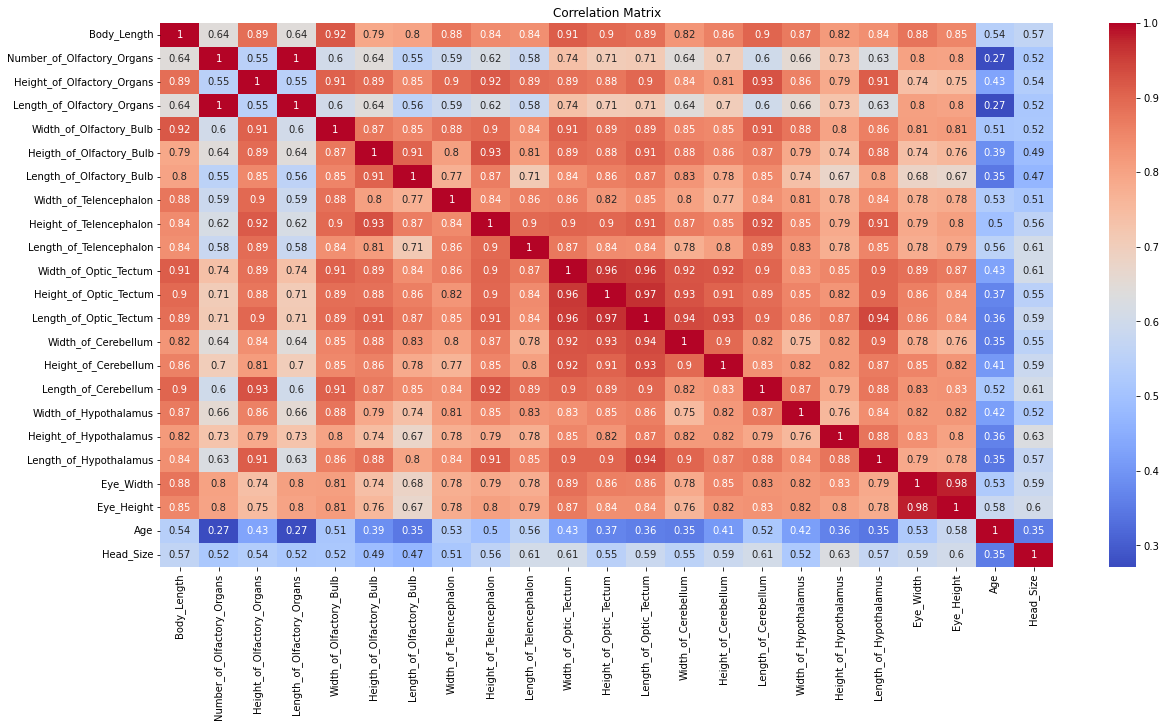

In [8]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix')
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

As it can be seen in large correlation matrix, many features are correlated with each other. This means VIF method will be used to remove multicollinearity. Also, due to the fact that there are many features, feature selection will be done if needed.

#### Removing Morph

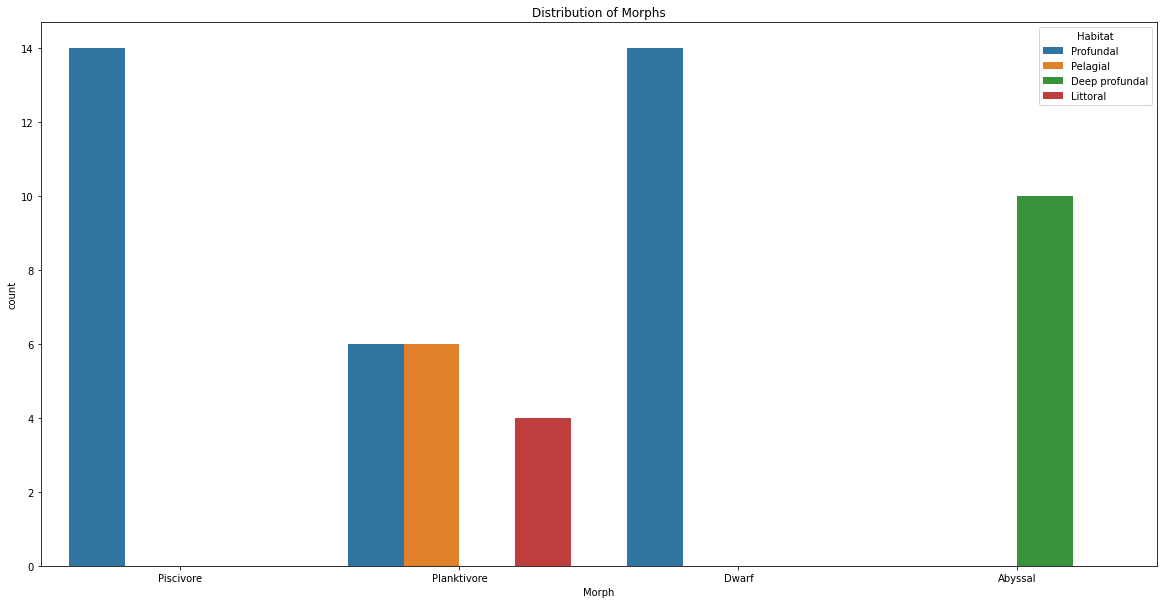

In [9]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Morphs')
sns.countplot(x=y_train, hue=X_train['Habitat'])
plt.show()

As it can be seen in barplot, Planktivore morph exists in all habitats except deep profundal, while dwarf and piscivore morphs exist only in profundal habitat. Deep profundal habitat is the only habitat that has only abyssal morph. This means that habitat and morph are correlated with each other. Due to that, Habitat will be dropped from the dataset.

In [10]:
X_train = X_train.drop('Habitat', axis=1)
X_test = X_test.drop('Habitat', axis=1)

### Boxplots
In this section, boxplots of the numerical features are plotted to check if the data need scaling.

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


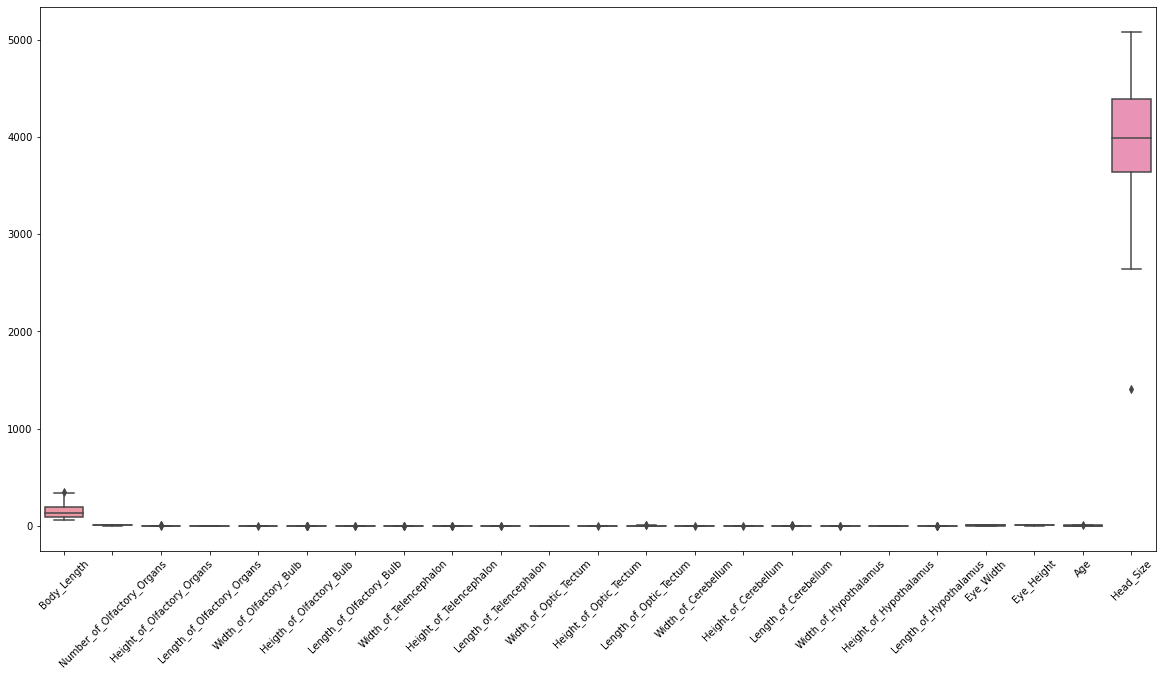

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.show()

As it can be seen, values of Head_Size are much higher than the other features. Due to that, scaling will be needed.

All in all, the data is ready for scaling and feature selection.

## Methodologies
In pre-processing part, the following methods are used:
- VIF to remove multicollinearity
- Standard Scaler to scale the data
- One Hot Encoding to encode categorical features
- Sequential Feature Selection (SFS) to select features

After that, the following models are used:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine

### Pre-processing

#### Multicollinearity

In this section, VIF method will be used to remove multicollinearity. VIF values of the features are obtained and features with VIF values higher than 5 are dropped. After that, VIF values are obtained again and there are no features with VIF values higher than 5. Therefore, there is no multicollinearity in the dataset. For this, functions VIF and no_multicollinearity are created. VIF function basically takes the dataframe, then picks the numerical features. After that, adds a intercept feature to the dataframe and calculates VIF values of the features. Finally, sorts the VIF values in descending order, removes the intercept, and returns remaining VIF values as a dataframe. This dataframe contains the features and their VIF values.

In [12]:
def VIF(dataframe):
    dataframe = dataframe.select_dtypes(include=np.number)
    dataframe['intercept'] = 1
    vif = pd.DataFrame()
    vif["feature"] = dataframe.columns
    vif["VIF"] = 0
    for i in range(len(dataframe.columns)):
            vif.loc[i, 'VIF'] = variance_inflation_factor(dataframe.values, i)
    vif.sort_values('VIF',ascending= False, inplace = True) #sort by descending order
    vif = vif[vif.feature != 'intercept'] #remove intercept
    return vif

Due to the fact that there are 26 features, VIF must be calculated until VIF values for all features are lower than 5. Instead of wasting time and space by calculating VIF again and again, no_multicollinearity function is used. no_multi_collinearity basically checks the output of VIF function, if there are any features with VIF values higher than 5, it drops the feature with highest VIF value and calculates VIF again. Also it prints the dropped feature and its VIF value. This process is repeated until there are no features with VIF values higher than 5. 

In [13]:
def no_multicollinearity(df):
    if VIF(df).iloc[0,1]>5:
        print(VIF(df).iloc[0,0], 'has been removed')
        df = df.drop(VIF(df).iloc[0,0], axis=1)
        return no_multicollinearity(df)
    else:
        display(VIF(df))
        return df.columns

In [14]:
remanining_columns = no_multicollinearity(X_train)

Number_of_Olfactory_Organs has been removed
Eye_Width has been removed
Length_of_Optic_Tectum has been removed
Width_of_Optic_Tectum has been removed
Height_of_Olfactory_Organs has been removed
Height_of_Optic_Tectum has been removed
Height_of_Telencephalon has been removed
Length_of_Hypothalamus has been removed
Length_of_Cerebellum has been removed
Width_of_Olfactory_Bulb has been removed
Heigth_of_Olfactory_Bulb has been removed
Body_Length has been removed
Eye_Height has been removed
Height_of_Cerebellum has been removed
Length_of_Telencephalon has been removed
Width_of_Cerebellum has been removed


,feature,VIF
2,Width_of_Telencephalon,4.947286
4,Height_of_Hypothalamus,4.122877
3,Width_of_Hypothalamus,3.720724
1,Length_of_Olfactory_Bulb,2.814329
0,Length_of_Olfactory_Organs,2.300551
6,Head_Size,1.735558
5,Age,1.471495


After that, the features with VIF values lower than 5 are selected and the dataset is updated. There are 11 features left in the dataset.

In [15]:
print(remanining_columns)

Index(['Length_of_Olfactory_Organs', 'Length_of_Olfactory_Bulb',
       'Width_of_Telencephalon', 'Width_of_Hypothalamus',
       'Height_of_Hypothalamus', 'Genetic_Trait', 'Maturation', 'Age', 'Sex',
       'Head_Size'],
      dtype='object')


In [16]:
X_train_multicollinearity = X_train[remanining_columns]
X_test_multicollinearity = X_test[remanining_columns]
X_train_multicollinearity.head()

,Length_of_Olfactory_Organs,Length_of_Olfactory_Bulb,Width_of_Telencephalon,Width_of_Hypothalamus,Height_of_Hypothalamus,Genetic_Trait,Maturation,Age,Sex,Head_Size
34,1.00,1.15,1.00,1.08,0.92,Hybrid,Mature,5,Male,4897.78305
46,1.00,1.00,1.08,1.08,1.00,Pure,Mature,6,Male,4775.23689
62,0.85,2.38,1.38,1.15,1.08,Pure,Mature,5,Female,4073.35269
10,0.62,0.69,0.62,0.77,0.62,Pure,Immature,3,Male,1402.90918
22,0.46,0.54,0.69,0.77,0.62,Pure,Mature,6,Male,3950.60124


### Encoding

In this section, categorical features are encoded. OneHotEncoder from sklearn is used for this. There are three categoric variables in the data set and all of them are binary: Genetic_Trait, Maturation, and Sex. Due to that, columns are dropped while encoding. Firstly, the categorical features are selected and then they are encoded. After that, the encoded features are added to the dataset and the old features are dropped. Finally, the dataset is updated.

In [17]:
X_train_categorical = X_train_multicollinearity.select_dtypes(include='object')
X_test_categorical = X_test_multicollinearity.select_dtypes(include='object')
X_train_numerical = X_train_multicollinearity.select_dtypes(include=np.number)
X_test_numerical = X_test_multicollinearity.select_dtypes(include=np.number)

ohe = OneHotEncoder(drop='if_binary', sparse=False)
X_train_categorical = ohe.fit_transform(X_train_categorical)
X_test_categorical = ohe.transform(X_test_categorical)

X_train_ohe = pd.concat([X_train_numerical, X_train_categorical], axis=1)
X_test_ohe = pd.concat([X_test_numerical, X_test_categorical], axis=1)
X_train_ohe.head()

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Length_of_Olfactory_Organs,Length_of_Olfactory_Bulb,Width_of_Telencephalon,Width_of_Hypothalamus,Height_of_Hypothalamus,Age,Head_Size,Genetic_Trait_Pure,Maturation_Mature,Sex_Male
34,1.00,1.15,1.00,1.08,0.92,5,4897.78305,0.0,1.0,1.0
46,1.00,1.00,1.08,1.08,1.00,6,4775.23689,1.0,1.0,1.0
62,0.85,2.38,1.38,1.15,1.08,5,4073.35269,1.0,1.0,0.0
10,0.62,0.69,0.62,0.77,0.62,3,1402.90918,1.0,0.0,1.0
22,0.46,0.54,0.69,0.77,0.62,6,3950.60124,1.0,1.0,1.0


#### Feature Scaling

In this section, the data is scaled. StandardScaler from sklearn is used for this. 

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ohe)
X_test_scaled = scaler.transform(X_test_ohe)
X_train_scaled.head()

,Length_of_Olfactory_Organs,Length_of_Olfactory_Bulb,Width_of_Telencephalon,Width_of_Hypothalamus,Height_of_Hypothalamus,Age,Head_Size,Genetic_Trait_Pure,Maturation_Mature,Sex_Male
34,0.843570,0.732729,0.213560,0.775813,0.317832,0.100251,1.446951,-1.414214,0.861357,0.736788
46,0.843570,0.301712,0.437487,0.775813,0.637143,0.551380,1.262473,0.707107,0.861357,0.736788
62,0.164354,4.267067,1.277212,1.083210,0.956453,0.100251,0.205875,0.707107,0.861357,-1.357242
10,-0.877112,-0.589056,-0.850092,-0.585519,-0.879582,-0.802008,-3.814143,0.707107,-1.160959,0.736788
22,-1.601610,-1.020073,-0.654157,-0.585519,-0.879582,0.551380,0.021088,0.707107,0.861357,0.736788


#### Feature Selection

In this section, feature selection is done. Sequential Feature Selection (SFS) is used for feature selection. For SFS, a basic logistic regression model is made. After that, SFS is applied to the model. Feature index, cross validation scores, average cross validation score, and feature names are obtained from SFS and saved as a dataframe. Dataframe can be seen below.

In [19]:
logreg = LogisticRegression(random_state=1773)
sfs  = SFS(logreg, k_features=10, forward=True, floating=False, scoring='accuracy', cv=4) #sadly used 4 folds because y_train has 4 classes
sfs.fit(X_train_scaled, y_train)
sfs_df = pd.DataFrame(sfs.subsets_).T
sfs_df.sort_values('avg_score',ascending= False, inplace = True)
sfs_df

,feature_idx,cv_scores,avg_score,feature_names
7,"(0, 1, 2, 3, 4, 5, 8)","[0.7142857142857143, 0.7857142857142857, 0.769...",0.798077,"(Length_of_Olfactory_Organs, Length_of_Olfacto..."
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.6428571428571429, 0.7857142857142857, 0.769...",0.78022,"(Length_of_Olfactory_Organs, Length_of_Olfacto..."
6,"(0, 2, 3, 4, 5, 8)","[0.7857142857142857, 0.7857142857142857, 0.615...",0.777473,"(Length_of_Olfactory_Organs, Width_of_Telencep..."
4,"(0, 3, 4, 5)","[0.8571428571428571, 0.6428571428571429, 0.615...",0.759615,"(Length_of_Olfactory_Organs, Width_of_Hypothal..."
5,"(0, 2, 3, 4, 5)","[0.8571428571428571, 0.7142857142857143, 0.538...",0.758242,"(Length_of_Olfactory_Organs, Width_of_Telencep..."
3,"(0, 3, 5)","[0.9285714285714286, 0.6428571428571429, 0.615...",0.739011,"(Length_of_Olfactory_Organs, Width_of_Hypothal..."
9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)","[0.5714285714285714, 0.6428571428571429, 0.692...",0.707418,"(Length_of_Olfactory_Organs, Length_of_Olfacto..."
2,"(0, 3)","[0.9285714285714286, 0.42857142857142855, 0.69...",0.646978,"(Length_of_Olfactory_Organs, Width_of_Hypothal..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.42857142857142855, 0.7142857142857143, 0.61...",0.631868,"(Length_of_Olfactory_Organs, Length_of_Olfacto..."
1,"(3,)","[0.7142857142857143, 0.5, 0.5384615384615384, ...",0.592033,"(Width_of_Hypothalamus,)"


Best accuracy score on training data and best columns can be seen below.

In [20]:
print('Best accuracy score:',sfs_df.avg_score.iloc[0])
print('Best features:', sfs_df.feature_names.iloc[0])
best_features = list(sfs_df.feature_names.iloc[0])

Best accuracy score: 0.7980769230769231
Best features: ('Length_of_Olfactory_Organs', 'Length_of_Olfactory_Bulb', 'Width_of_Telencephalon', 'Width_of_Hypothalamus', 'Height_of_Hypothalamus', 'Age', 'Maturation_Mature')


In [21]:
X_train_ = X_train_scaled[best_features]
X_test_ = X_test_scaled[best_features]
X_train_.head()

,Length_of_Olfactory_Organs,Length_of_Olfactory_Bulb,Width_of_Telencephalon,Width_of_Hypothalamus,Height_of_Hypothalamus,Age,Maturation_Mature
34,0.843570,0.732729,0.213560,0.775813,0.317832,0.100251,0.861357
46,0.843570,0.301712,0.437487,0.775813,0.637143,0.551380,0.861357
62,0.164354,4.267067,1.277212,1.083210,0.956453,0.100251,0.861357
10,-0.877112,-0.589056,-0.850092,-0.585519,-0.879582,-0.802008,-1.160959
22,-1.601610,-1.020073,-0.654157,-0.585519,-0.879582,0.551380,0.861357


This is the last step of pre-processing. After this, the data is ready for model building.

### Model Building

In model bulding part, logistic regression, k-nearest neighbors, and support vector machine models are used. After that, the models are evaluated and the best model is selected.

#### Logistic Regression

In [22]:
logisticregression = LogisticRegression(random_state=1773)
logisticregression.fit(X_train_, y_train)
y_pred = logisticregression.predict(X_test_)
logreg_score = accuracy_score(y_test, y_pred)
print('Accuracy score:',logreg_score)

Accuracy score: 0.7777777777777778


Accuracy score of the model is 0.77. Confusion matrix of the model is shown below.

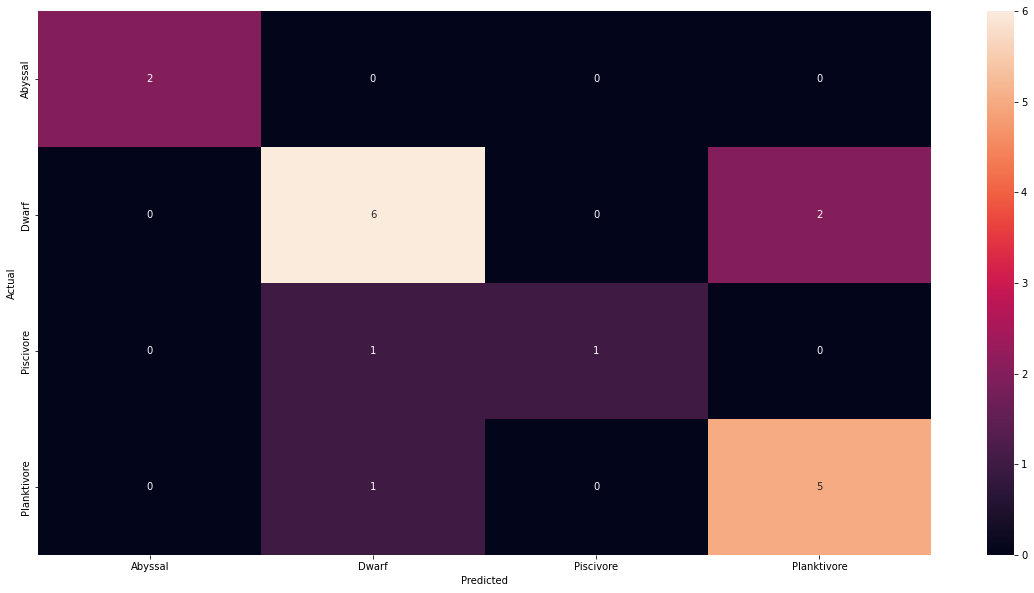

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=logisticregression.classes_, yticklabels=logisticregression.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As it can be seen, the test dataset is mostly dominated by Planktivore and Dwarf morphs. Classification report can be seen below

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Abyssal       1.00      1.00      1.00         2
       Dwarf       0.75      0.75      0.75         8
   Piscivore       1.00      0.50      0.67         2
 Planktivore       0.71      0.83      0.77         6

    accuracy                           0.78        18
   macro avg       0.87      0.77      0.80        18
weighted avg       0.79      0.78      0.77        18



If classification report is examined, it can be seen that Piscivore has a precision score of 1 while its recall score is 0.5. Also Abyssal morph has both precision and recall score of 1. This extreme values are caused by small support of these morphs. Two of each morph exists in the test dataset. Furthermore, Dwarf morph with 8 support and Planktivore with 6 support have f1 scores of 0.75 and 0.77. 

### K-Nearest Neighbors

In [25]:
# grid search for best number of neighbors
knn = KNeighborsClassifier()
params = {'n_neighbors':range(1,11)}
knn_gs = GridSearchCV(knn, params, cv=4)
knn_gs.fit(X_train_, y_train)
best_neighbors = knn_gs.best_params_['n_neighbors']
print('Best number of neighbors:', best_neighbors)

Best number of neighbors: 7


In [26]:
knn = KNeighborsClassifier(best_neighbors)
knn.fit(X_train_, y_train)
y_pred = knn.predict(X_test_)
knn_score = accuracy_score(y_test, y_pred)
print('Accuracy score:',knn_score)

Accuracy score: 0.7777777777777778


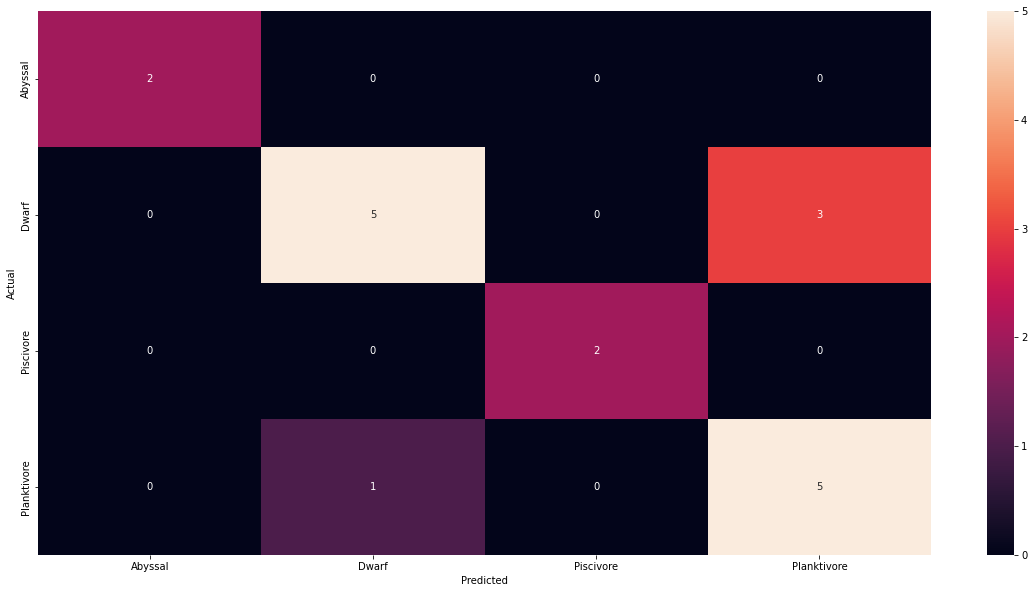

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Abyssal       1.00      1.00      1.00         2
       Dwarf       0.83      0.62      0.71         8
   Piscivore       1.00      1.00      1.00         2
 Planktivore       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.86      0.86      0.86        18
weighted avg       0.80      0.78      0.78        18



In this model, all Abbysal and Piscivore morphs are classified correctly thanks to their small sample size. Furthermore, Dwarf morphs have f1-score of 0.71 while Planktivore have f1-score of 0.71 too. If their precision, recall and f1 scores are compared with the scores of logistic regression, it can be seen that this model is better at classifying actual Dwarf morphs while logistic regression is better at classifying actual Planktivore morphs. Even though accuracy score of both models is same, KNN model is better to use while finding Dwarf Morphs is more important, and logistic regression is better to use while finding Planktivore morphs is more important.

### SVM

In [29]:
svc = SVC(random_state=1773)
params = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['poly', 'sigmoid', 'linear',]} 
svc_gs = GridSearchCV(svc, params, cv=4) #grid search for svc
svc_gs.fit(X_train_, y_train) 
best_C = svc_gs.best_params_['C']
best_gamma = svc_gs.best_params_['gamma']
best_kernel = svc_gs.best_params_['kernel']
print('Best C:', best_C)
print('Best gamma:', best_gamma)
print('Best kernel:', best_kernel)

Best C: 0.1
Best gamma: 1
Best kernel: linear


In [30]:
svc = SVC(kernel=best_kernel, C = best_C, gamma = best_gamma, random_state=1773)
svc.fit(X_train_, y_train)
y_pred = svc.predict(X_test_)
svc_score = accuracy_score(y_test, y_pred)
print('Accuracy score:',accuracy_score(y_test, y_pred))


Accuracy score: 0.8333333333333334


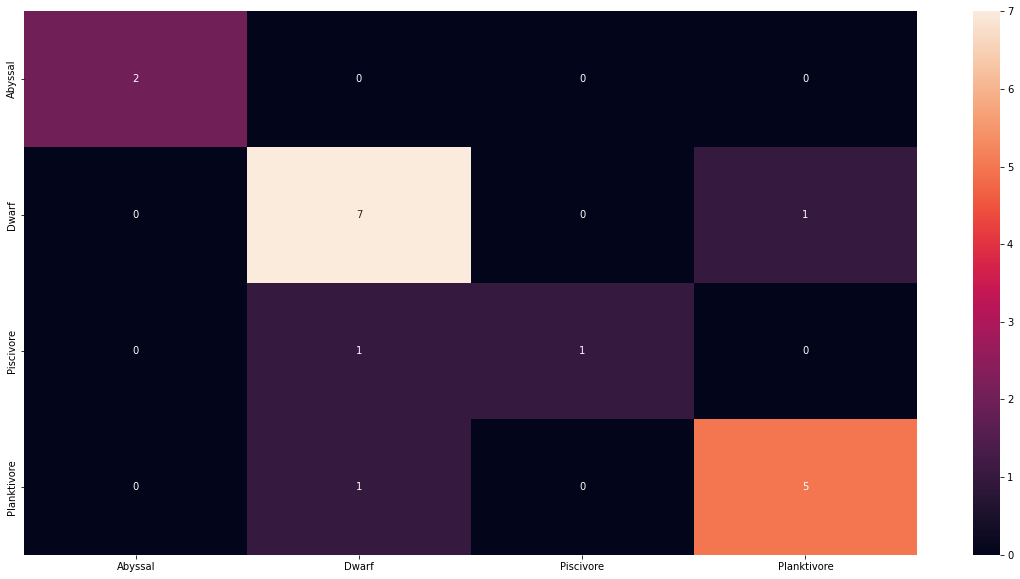

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Abyssal       1.00      1.00      1.00         2
       Dwarf       0.78      0.88      0.82         8
   Piscivore       1.00      0.50      0.67         2
 Planktivore       0.83      0.83      0.83         6

    accuracy                           0.83        18
   macro avg       0.90      0.80      0.83        18
weighted avg       0.85      0.83      0.83        18



Accuracy score of SVM model is 0.83. This is the best accuracy of three models. If classification report of the model is examined, It can be seen that f1-score of Abbysal morph is 1 while recall score of Piscivore is 0.5. This is the same problem that occured in Logistic Regression model, caused by small sample size of those morphs in the test dataset. Both precision, recall and f1 scores of Dwarf and Planktivore morphs are higher than the scores of Logistic Regression and KNN models. This means that SVM model is better at classifying both Dwarf and Planktivore morphs. Overall, SVM model is the best model to use.

## Results

In [33]:
print('Logistic Regression:', logreg_score)
print('KNN:', knn_score)
print('SVC:', svc_score)


Logistic Regression: 0.7777777777777778
KNN: 0.7777777777777778
SVC: 0.8333333333333334


SVM model is the best model to use. It has the highest accuracy score and highest f1 scores for Dwarf and Planktivore morphs. Furthermore, it is better at classifying both Dwarf and Planktivore morphs. Due to that, SVM model is the best model to use. Between KNN and Logistic Regression, KNN is better while finding Dwarf morphs is more important, and Logistic Regression is better while finding Planktivore morphs is more important.

## Conclusion
All in all, morphs of the fish are predicted with the help of their physical features. Variance inflation factor (VIF), one hot encoding (OHE), standard scaler, and sequential feature selection (SFS) are used in pre-processing part. After that, logistic regression, k-nearest neighbors, and support vector machine models are used. While logistic regression and k-nearest neighbors have same accuracy score of 0.77, SVM model has the highest accuracy score of 0.83. 

## References

- National Cancer Institute. *Olfactory Bulb*. Retreived from https://www.cancer.gov/publications/dictionaries/cancer-terms/def/olfactory-bulb
- Peris, A. (2021). *A brain and a head for a different habitat: size variation in four morphs of Arctic charr (Salvelinus alpinus (L.)) in a deep oligotrophic lake*. Data Dryad. Retreived from https://datadryad.org/stash/dataset/doi:10.5061/dryad.15dv41nvt

In [34]:
session_info.show()

In [35]:
end_time = time.time()
elapsed_time = end_time - start_time
print('%.2f seconds taken' % elapsed_time)
#In 10.06.2023 02.35, It took 17.5 seconds to run the notebook.

17.66 seconds taken
